# Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
melb = pd.read_csv('melb_data.csv')
print(melb.shape)
melb.head(3)

(13580, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


# Preprocessing

In [3]:
melb.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car               True
Landsize         False
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [4]:
car_average = melb[melb.Car != np.nan].Car.mean()
print(car_average)
melb.Car = melb.Car.replace(np.nan, car_average)
not melb.Car.isnull().any()

1.6100754549489569


True

In [5]:
# remove indecisible features
melb = melb.dropna(axis=0)
melb.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

# EDA

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

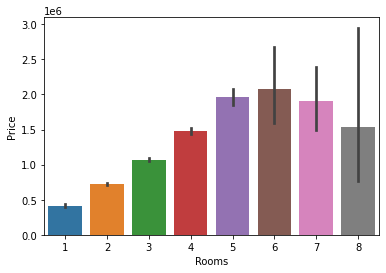

In [6]:
sns.barplot(data=melb, x='Rooms', y='Price')

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

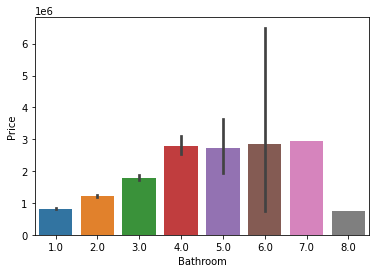

In [7]:
sns.barplot(data=melb, x='Bathroom', y='Price')

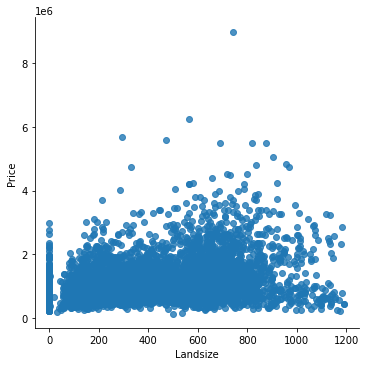

In [8]:
# 아주 미세한 우상향이기 때문에  이상하게도 포함 시켰을 때만 의미가 있었다.
sns.lmplot(data=melb[melb.Landsize < 1200], x='Landsize', y='Price', fit_reg=False)

# Defining a model

In [9]:
features = ['Rooms', 'Bathroom', 'Lattitude', 'Landsize', 'Longtitude']
X = melb[features]
X.describe()

,Rooms,Bathroom,Lattitude,Landsize,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,-37.807904,471.006940,144.990201
std,0.971079,0.711362,0.075850,897.449881,0.099165
min,1.000000,1.000000,-38.164920,0.000000,144.542370
25%,2.000000,1.000000,-37.855438,152.000000,144.926198
50%,3.000000,1.000000,-37.802250,373.000000,144.995800
75%,4.000000,2.000000,-37.758200,628.000000,145.052700
max,8.000000,8.000000,-37.457090,37000.000000,145.526350


In [10]:
print(X.shape)
X.head(3)

(6196, 5)


,Rooms,Bathroom,Lattitude,Landsize,Longtitude
1,2,1.0,-37.8079,156.0,144.9934
2,3,2.0,-37.8093,134.0,144.9944
4,4,1.0,-37.8072,120.0,144.9941


In [11]:
y = melb.Price
print(y.shape)
y.head(3)

(6196,)


1    1035000.0
2    1465000.0
4    1600000.0
Name: Price, dtype: float64

# Training

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [13]:
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

## Hyperparameter Tuning

### Grid Search

In [21]:
# find best depth
max_depth_list = [3,5,7, 10, 20, 30, 50]
for max_depth in max_depth_list:
    _model = RandomForestRegressor(random_state=0, max_depth=max_depth)
    _prediction = cross_val_predict(_model, X, y, cv=5)
    RMSE = mean_squared_error(y, _prediction)
    print("%d max_depth - %d" %(max_depth, RMSE))

3 max_depth - 262021719673
5 max_depth - 199515628489
7 max_depth - 165591742804
10 max_depth - 132743746786
20 max_depth - 117642640813
30 max_depth - 117632238247
50 max_depth - 117693297321


In [22]:
# find best leaf_nodes
max_leaf_nodes_list = [5, 50, 500, 5000]
for max_leaf_nodes in max_leaf_nodes_list:
    _model = RandomForestRegressor(random_state=0, max_leaf_nodes=max_leaf_nodes)
    _prediction = cross_val_predict(_model, X, y, cv=5)
    RMSE = mean_squared_error(y, _prediction)
    print("%d max_leaf_nodes %d" %(max_leaf_nodes, RMSE))

5 max_leaf_nodes 285043876187
50 max_leaf_nodes 151068206322
500 max_leaf_nodes 118419960666
5000 max_leaf_nodes 117119905889


In [23]:
# model = DecisionTreeRegressor(random_state=1)
model = RandomForestRegressor(random_state=0, max_depth=20, max_leaf_nodes=500)
model.fit(X, y)

RandomForestRegressor(max_depth=20, max_leaf_nodes=500, random_state=0)

# Evaluation/Validation

In [24]:
prediction = cross_val_predict(model, X, y, cv=5)
prediction

array([1069065.63678938, 1299623.12108867, 1429773.90802706, ...,
        424570.38872559,  595354.63448742, 2448355.98881674])

In [25]:
RMSLE = np.sqrt(mean_squared_log_error(prediction, y))
# 1st iteration - DecisionTreeRegressor
# 0.32845... 굉장히 좋은 점수! - 'Rooms', 'Bathroom', 'Lattitude', 'Longtitude', 'Landsize'
# 0.39 Landsize를 뺐더니 더 점수가 나빠졌다
# 2st iteration - RandomForestRegressor
# 0.25475... 훨씬 좋은 점수!
# 3rd iteration - /w Hyperparameter tuning
# 0.2574.... 별 차이 없는 점수
RMSLE

0.2574823549650988

In [27]:
# checking real estimate difference /w hold out evaluation
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
model_alt = DecisionTreeRegressor()
model_alt.fit(train_X, train_y)
prediction_alt = model_alt.predict(val_X)
# DecisionTree 273,000$ error margin - 273331.192...
# RandomForest 274,643$ error margin - 274643.006... 에러마진은 거의 그대로.
# 이 경우는 hold out evaluation이기 때문에 아마도 hold out된 부분이 그렇지 않은 부분에 비하여 가격특이점이 있는 듯
mean_absolute_error(val_y, prediction_alt)

275661.1904454487

# Prediction/Export